Libraries used

In [29]:
# Librerías fundamentales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Para escalado y transformación
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer

# Para selección de features
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.decomposition import PCA

# Para el modelo KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Configuración de visualización
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

Files import and union

In [40]:
# Loading datasets and concatenating them
sp1 = pd.read_csv('data/spotify_parte_1.csv')
sp2 = pd.read_csv('data/spotify_parte_2.csv')

df = pd.concat([sp1, sp2], ignore_index=True)

#Checking a firtst glimpse of the data
df.head(500)

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,Ramshackle Glory,Introduction,5gHKYgKMiKfGhEsSONzej8,10,2012,acoustic,0.272,0.700,0,-10.424,1,0.0497,0.2160,0.000000,0.8280,0.238,71.719,271093,4
496,496,Tyler Ward,Ho Hey,3YbOccoztkmTTd4SqteNMb,20,2012,acoustic,0.457,0.450,0,-9.207,1,0.0322,0.3680,0.000090,0.1530,0.156,154.839,147484,4
497,497,Dave Barnes,White Flag,0NSLR0NMQ9XhlFafhFCAM5,10,2012,acoustic,0.670,0.915,1,-5.111,1,0.0451,0.0500,0.000005,0.3400,0.881,104.975,204680,4
498,498,Erin McCarley,Amber Waves,6JHHlemyLhmCKDkAE0yWWP,9,2012,acoustic,0.511,0.908,9,-5.965,0,0.0405,0.0193,0.000043,0.6770,0.477,148.027,254680,4


Exploratory Data Analysis

In [41]:
#Checking shape of the dataframe
df.shape

(1159748, 20)

In [42]:
#Checking data types of the columns
df.dtypes

Unnamed: 0            int64
artist_name          object
track_name           object
track_id             object
popularity            int64
year                  int64
genre                object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
dtype: object

In [43]:
# Checking missing values in the dataframe
df.isna().sum()

Unnamed: 0          0
artist_name         0
track_name          0
track_id            0
popularity          0
year                0
genre               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

In [26]:
# Dropping missing values
df = df.dropna()

In [27]:
# Dropping unnecessary columns
spotify = df.drop(columns=['Unnamed: 0', 'artist_name', 'track_name', 'track_id', 'year'])
spotify.columns

Index(['popularity', 'genre', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

In [28]:
spotify.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06
mean,1.838309e+01,5.374425e-01,6.396737e-01,5.287763e+00,-8.981292e+00,6.346560e-01,9.281520e-02,3.215380e-01,2.523423e-01,2.230197e-01,4.555689e-01,1.213775e+02,2.495587e+05,3.885880e+00
std,1.588563e+01,1.844753e-01,2.704993e-01,3.555204e+00,5.682203e+00,4.815267e-01,1.268416e-01,3.549873e-01,3.650701e-01,2.010712e-01,2.685169e-01,2.977964e+01,1.494243e+05,4.676983e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-5.810000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.073000e+03,0.000000e+00
25%,5.000000e+00,4.130000e-01,4.540000e-01,2.000000e+00,-1.082900e+01,0.000000e+00,3.710000e-02,6.400000e-03,1.050000e-06,9.790000e-02,2.260000e-01,9.879800e+01,1.810910e+05,4.000000e+00
50%,1.500000e+01,5.500000e-01,6.940000e-01,5.000000e+00,-7.450000e+00,1.000000e+00,5.070000e-02,1.470000e-01,1.760000e-03,1.340000e-01,4.380000e-01,1.219310e+02,2.257405e+05,4.000000e+00
75%,2.900000e+01,6.770000e-01,8.730000e-01,8.000000e+00,-5.276000e+00,1.000000e+00,8.900000e-02,6.400000e-01,6.140000e-01,2.920000e-01,6.740000e-01,1.399030e+02,2.869070e+05,4.000000e+00
max,1.000000e+02,9.930000e-01,1.000000e+00,1.100000e+01,6.172000e+00,1.000000e+00,9.710000e-01,9.960000e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.499930e+02,6.000495e+06,5.000000e+00


Estadísticas antes de StandardScaler:
       danceability        energy      loudness   speechiness  acousticness  \
count  1.159748e+06  1.159748e+06  1.159748e+06  1.159748e+06  1.159748e+06   
mean   5.374425e-01  6.396737e-01 -8.981292e+00  9.281520e-02  3.215380e-01   
std    1.844753e-01  2.704993e-01  5.682203e+00  1.268416e-01  3.549873e-01   
min    0.000000e+00  0.000000e+00 -5.810000e+01  0.000000e+00  0.000000e+00   
25%    4.130000e-01  4.540000e-01 -1.082900e+01  3.710000e-02  6.400000e-03   
50%    5.500000e-01  6.940000e-01 -7.450000e+00  5.070000e-02  1.470000e-01   
75%    6.770000e-01  8.730000e-01 -5.276000e+00  8.900000e-02  6.400000e-01   
max    9.930000e-01  1.000000e+00  6.172000e+00  9.710000e-01  9.960000e-01   

                key          mode  instrumentalness      liveness  \
count  1.159748e+06  1.159748e+06      1.159748e+06  1.159748e+06   
mean   5.287763e+00  6.346560e-01      2.523423e-01  2.230197e-01   
std    3.555204e+00  4.815267e-01      3.65

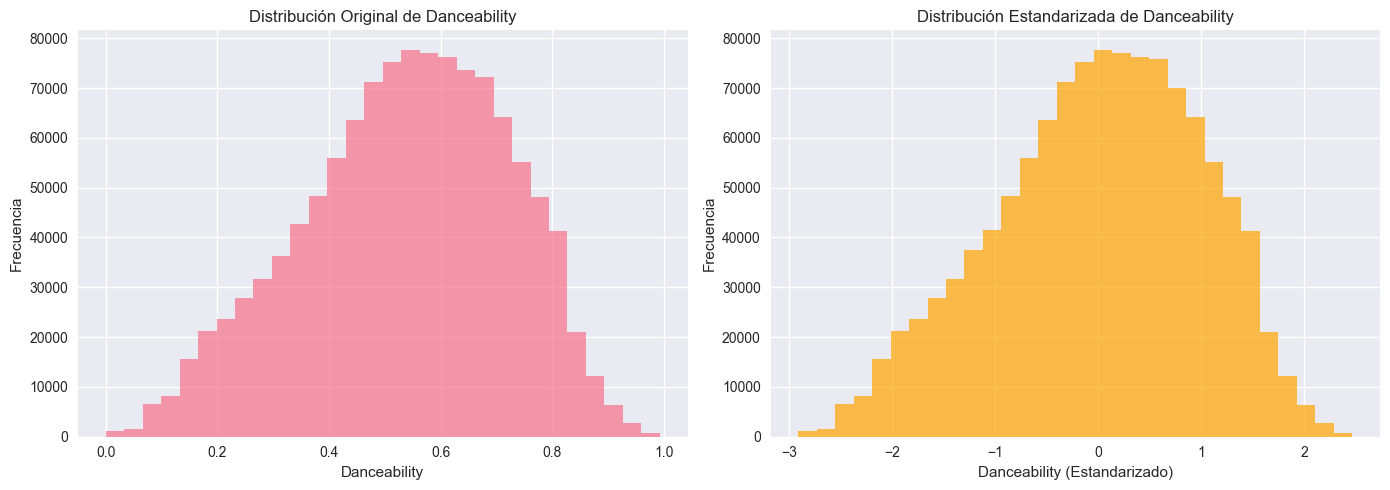

In [38]:
df_imputed = spotify.copy()

numeric_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'key', 'mode',
                    'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']
X_numeric = df_imputed[numeric_features].copy()

# Aplicar StandardScaler
scaler_standard = StandardScaler()
X_scaled_standard = scaler_standard.fit_transform(X_numeric)
df_scaled_standard = pd.DataFrame(X_scaled_standard, columns=[f'{col}_standard' for col in numeric_features])

print("Estadísticas antes de StandardScaler:")
print(X_numeric.describe())
print("\nEstadísticas después de StandardScaler:")
print(df_scaled_standard.describe())

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(X_numeric['danceability'], bins=30, alpha=0.7, label='Original')
axes[0].set_title('Distribución Original de Danceability')
axes[0].set_xlabel('Danceability')
axes[0].set_ylabel('Frecuencia')

axes[1].hist(df_scaled_standard['danceability_standard'], bins=30, alpha=0.7, color='orange', label='Estandarizado')
axes[1].set_title('Distribución Estandarizada de Danceability')
axes[1].set_xlabel('Danceability (Estandarizado)')
axes[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()
